# Udacity CarND Term1 Proj2
* to submit
* Joe Zhou
* ibalpowr@gmail.com
* Jan'17 Cohort
* german traffic signs classification

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.io.parsers import read_csv

import pickle

import numpy as np

from sklearn.utils import shuffle
import cv2

from tensorflow.contrib.layers import flatten
import tensorflow as tf

import time
import datetime

import os

import random

# load the dataset
* in pickle format

In [2]:
cd /ibalpowr/workbench/term1-proj2

/ibalpowr/workbench/term1-proj2


In [3]:
training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

In [4]:
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# assign train, validation, test sets, labels

In [5]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [6]:
X_train.shape
# [num examples, height, width, channels]
# [b,0,1,c]
# height == # of rows
# width == # of cols
# channel in RGB order

(34799, 32, 32, 3)

In [7]:
n_train = X_train.shape[0]
n_valid = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train[0].shape

# turn it into a set then count its length
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### assign proper label

In [8]:
labels = read_csv('data/signnames.csv').values[:,1]

# visualize the training set and its each classes
* distribution among each classes
    * very uneven

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]


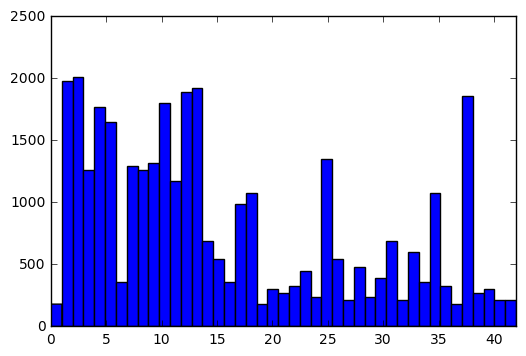

In [9]:
plt.hist(y_train, bins=n_classes)
plt.xlim(xmax=n_classes-1)
plt.show 

hist, _ = np.histogram(y_train, bins=n_classes)
print(hist)

[ 30 240 240 150 210 210  60 150 150 150 210 150 210 240  90  90  60 120
 120  30  60  60  60  60  30 150  60  30  60  30  60  90  30  90  60 120
  60  30 210  30  60  30  30]


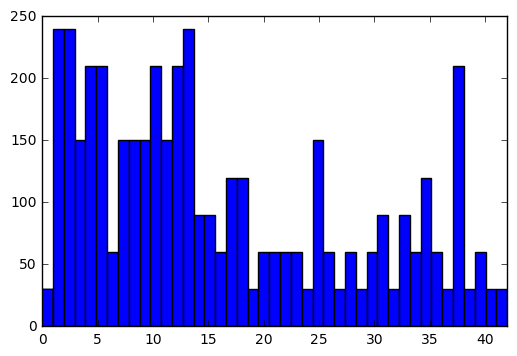

In [10]:
plt.hist(y_valid, bins=n_classes)
plt.xlim(xmax=n_classes-1)
plt.show 

hist_valid, _ = np.histogram(y_valid, bins=n_classes)
print(hist_valid)

### show each sign
* first five + random five
* their clahe's

In [11]:
unique, index, count = np.unique(y_train, return_index=True, 
                                 return_counts=True)

In [12]:
# create a "Contrast Limited Adaptive Histogram Equalization" function
clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(4,4))

class 0: Speed limit (20km/h)


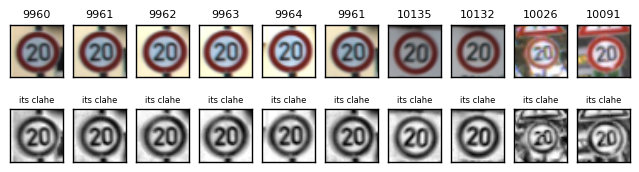

class 1: Speed limit (30km/h)


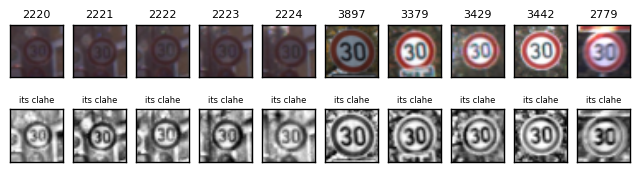

class 2: Speed limit (50km/h)


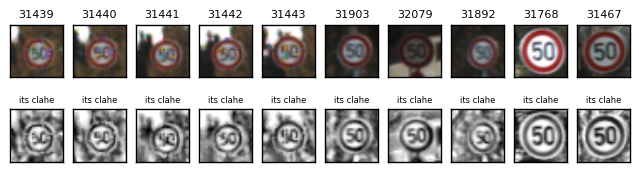

class 3: Speed limit (60km/h)


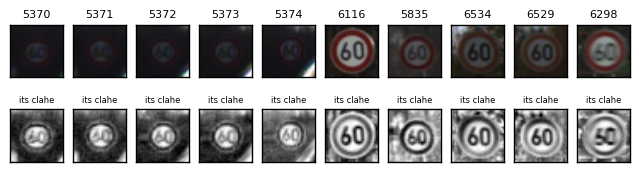

class 4: Speed limit (70km/h)


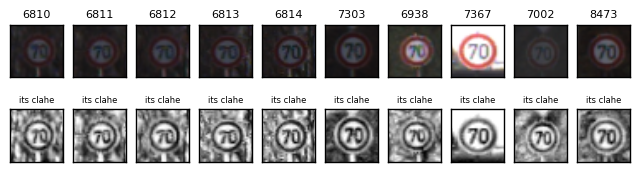

class 5: Speed limit (80km/h)


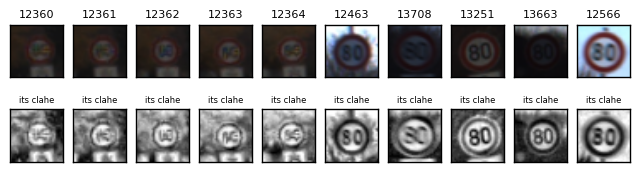

class 6: End of speed limit (80km/h)


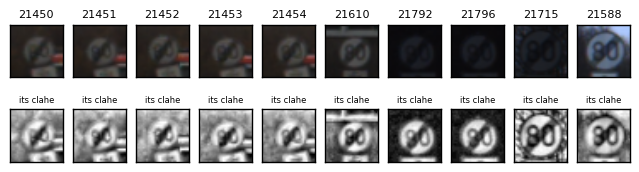

class 7: Speed limit (100km/h)


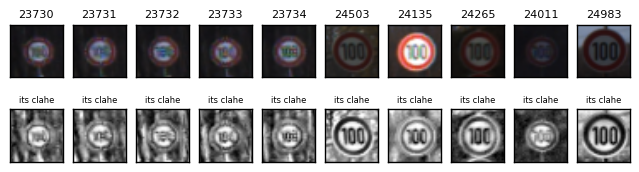

class 8: Speed limit (120km/h)


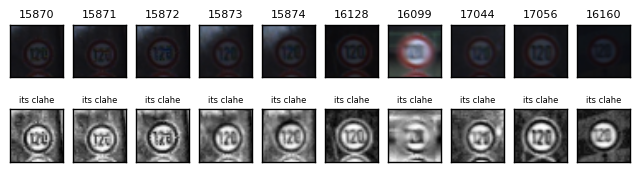

class 9: No passing


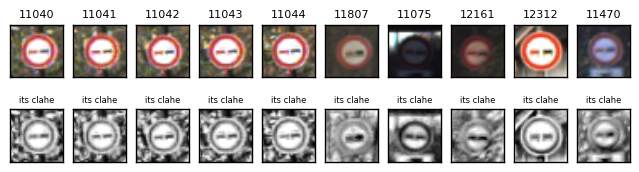

class 10: No passing for vechiles over 3.5 metric tons


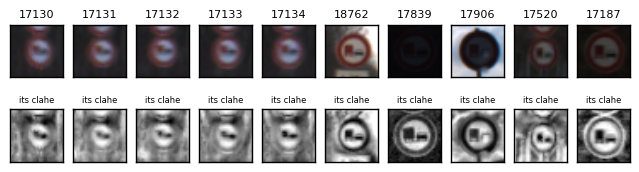

class 11: Right-of-way at the next intersection


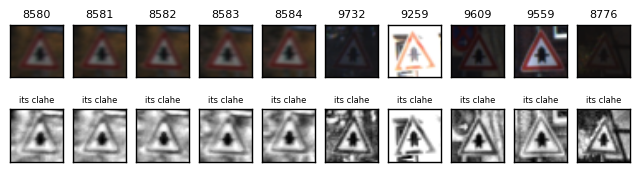

class 12: Priority road


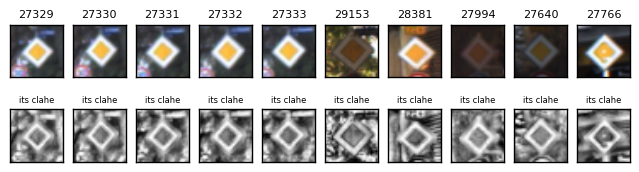

class 13: Yield


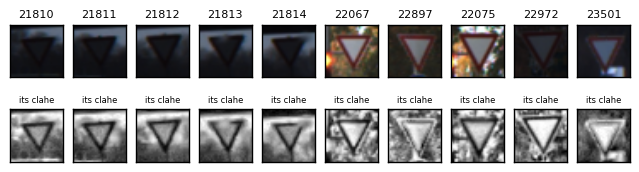

class 14: Stop


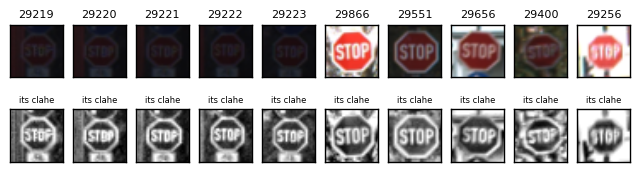

class 15: No vechiles


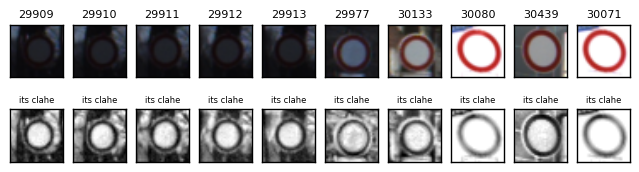

class 16: Vechiles over 3.5 metric tons prohibited


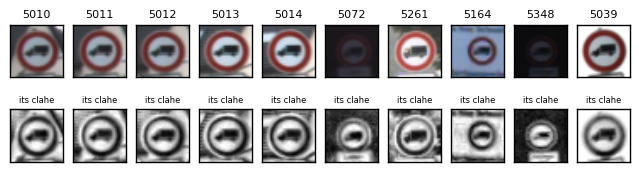

class 17: No entry


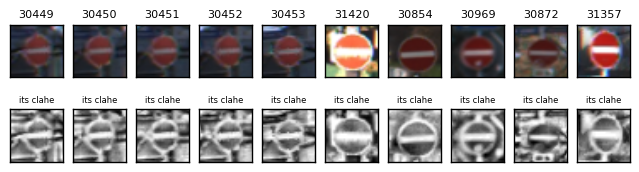

class 18: General caution


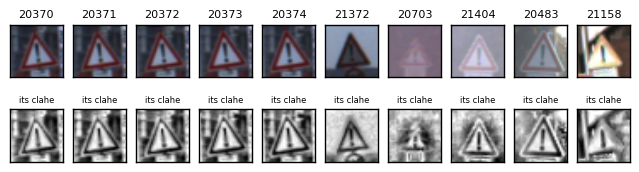

class 19: Dangerous curve to the left


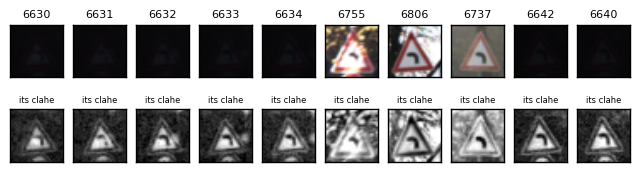

class 20: Dangerous curve to the right


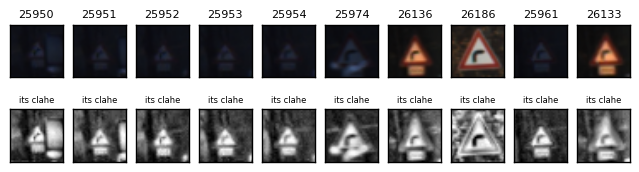

class 21: Double curve


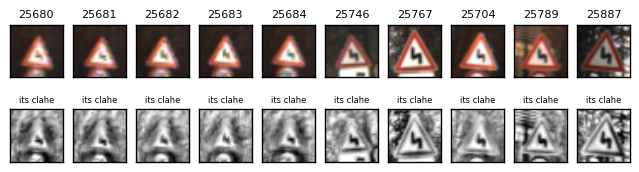

class 22: Bumpy road


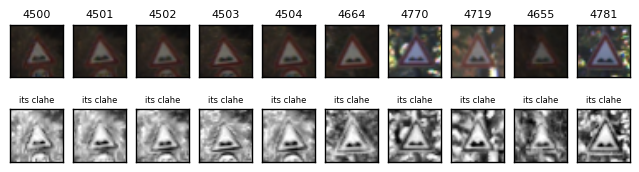

class 23: Slippery road


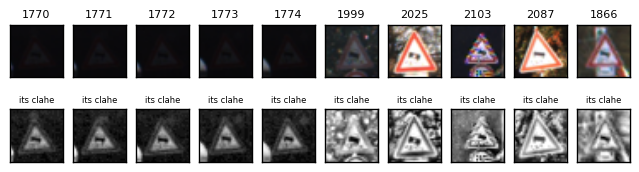

class 24: Road narrows on the right


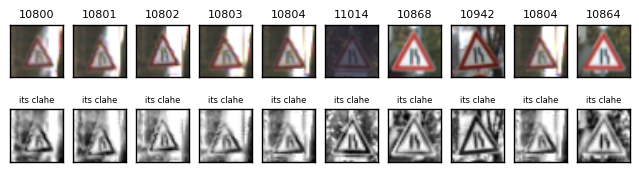

class 25: Road work


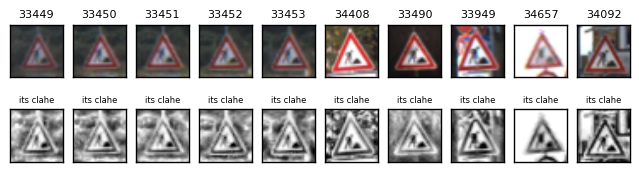

class 26: Traffic signals


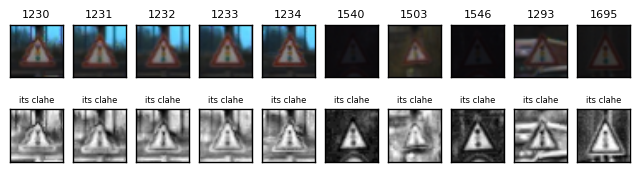

class 27: Pedestrians


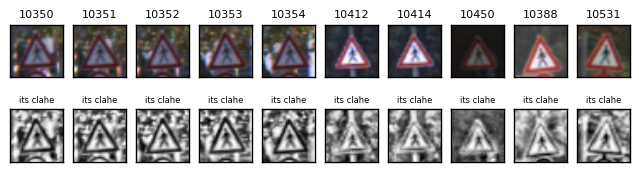

class 28: Children crossing


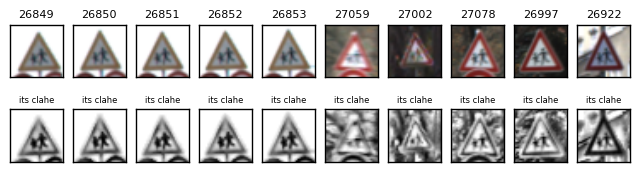

class 29: Bicycles crossing


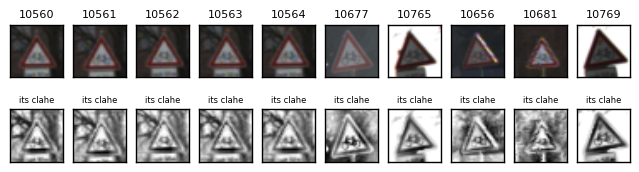

class 30: Beware of ice/snow


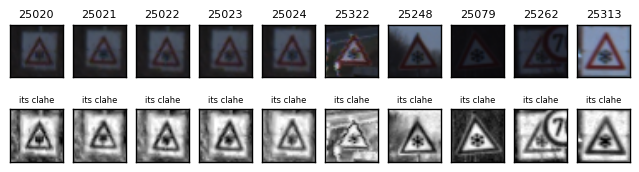

class 31: Wild animals crossing


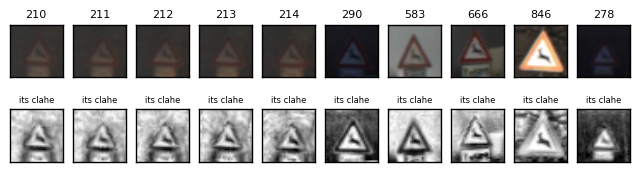

class 32: End of all speed and passing limits


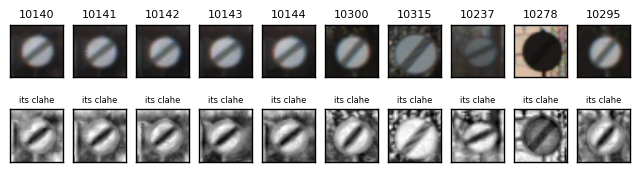

class 33: Turn right ahead


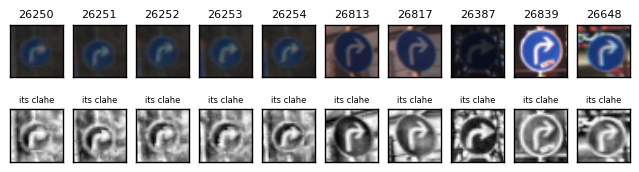

class 34: Turn left ahead


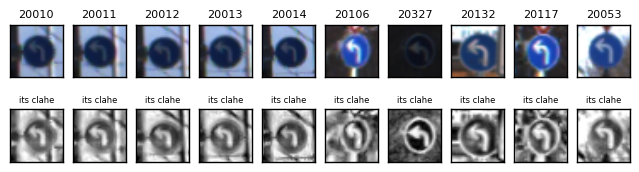

class 35: Ahead only


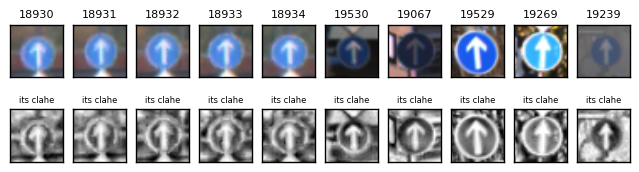

class 36: Go straight or right


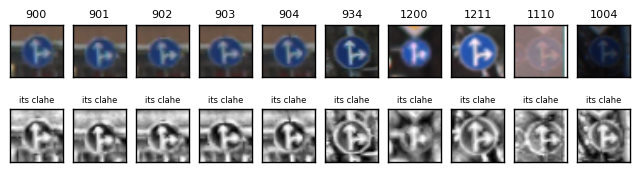

class 37: Go straight or left


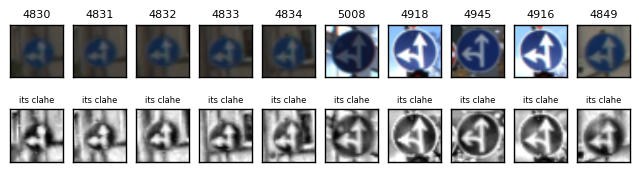

class 38: Keep right


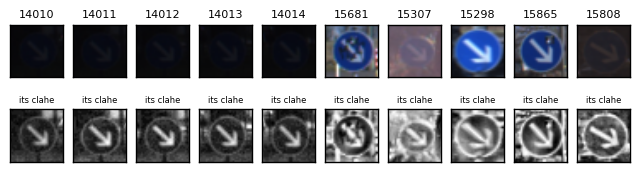

class 39: Keep left


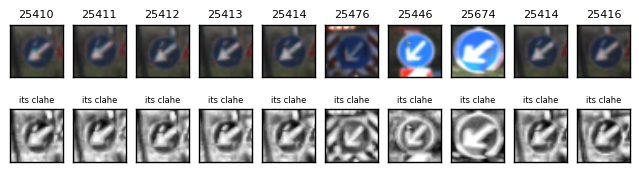

class 40: Roundabout mandatory


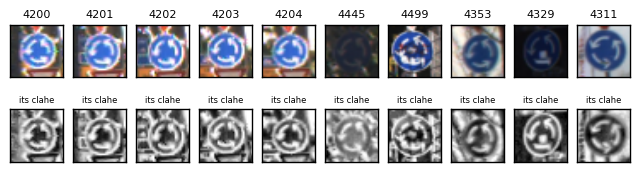

class 41: End of no passing


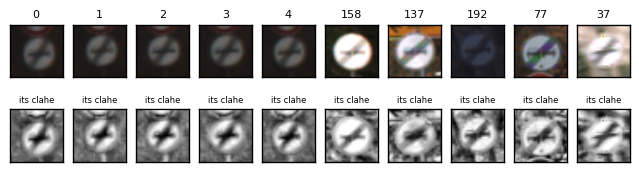

class 42: End of no passing by vechiles over 3.5 metric tons


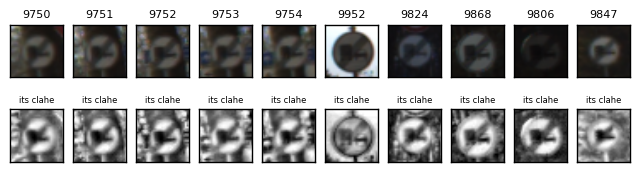

In [13]:
for c, i, k in zip(unique, index, count):
    #print("class %i: %s" % (c,labels[c])
    print("class " + str(c) + ": " + labels[c])
    fig = plt.figure(figsize = (8,2))
    # assuming each class been grouped together
    # print first five examples of each class
    first_five = range(i,i+5,1)
    for j in range(5):
        # set x and y axes to none
        axis = fig.add_subplot(2,10,j+1,xticks=[],yticks=[])
        axis.imshow(X_train[first_five[j]])
        axis.set_title(first_five[j], fontsize=8)
    # print five random examples from each class
    random_five = random.sample(range(i, i+k), 5)
    for j in range(5):
        axis = fig.add_subplot(2,10,j+5+1,xticks=[],yticks=[])
        axis.imshow(X_train[random_five[j]])
        axis.set_title(random_five[j], fontsize=8)
        
    for j in range(5):
        axis = fig.add_subplot(2,10,j+10+1,xticks=[],yticks=[])
        axis.imshow(clahe.apply(cv2.cvtColor(X_train[first_five[j]],                        
                                             cv2.COLOR_RGB2YCrCb)[:,:,0]), 
                    cmap='gray')
        axis.set_title('its clahe', fontsize=6)
    
    for j in range(5):
        axis = fig.add_subplot(2,10,j+15+1,xticks=[],yticks=[])
        axis.imshow(clahe.apply(cv2.cvtColor(X_train[random_five[j]], 
                                             cv2.COLOR_RGB2YCrCb)[:,:,0]), 
                    cmap='gray')
        axis.set_title('its clahe', fontsize=6)

    plt.show()
    print('========')

### geometric transformations of images

#### scaling

In [14]:
def scale_image(img):
    height, width, _ = img.shape
    # original image randomly scaled by one number from [0.9, 1.1]
    scale_factor = np.random.uniform(0.9, 1.1)
    scaled = cv2.resize(img, None, fx=scale_factor, fy=scale_factor,
                   interpolation = cv2.INTER_AREA)
    if scale_factor > 1:
        # strip the extra
        return scaled[0:32, 0:32]
    else:
        # repad the border 
        new_height, new_width, _ = scaled.shape
        pad1 = (height - new_height)//2
        pad2 = (height - new_height) - pad1
        scaled = cv2.copyMakeBorder(scaled, pad1,pad2,pad1,pad2, 
                                    borderType=cv2.BORDER_REPLICATE)
        return scaled        

#### translating

In [15]:
def translate_image(img):
    # randomly shift the original by 2 or less pixels in 4 directions
    t = random.sample(range(-2,2),2)
    M = np.float32([[1,0,t[0]],[0,1,t[1]]])
    rows, cols, _ = img.shape
    translated = cv2.warpAffine(img, M, (cols, rows), 
                                borderMode=cv2.BORDER_REPLICATE)
    return translated

#### rotating

In [16]:
def rotate_image(img):
    # randomly rotate the original by 15 degree cw or ccw
    theta = random.sample(range(-15, 15),1)
    (height, width) = img.shape[:2]
    M = cv2.getRotationMatrix2D((height/2, width/2), theta[0], 1)
    rotated = cv2.warpAffine(img, M, (height, width), 
                             borderMode=cv2.BORDER_REPLICATE)
    return rotated

#### showing an example

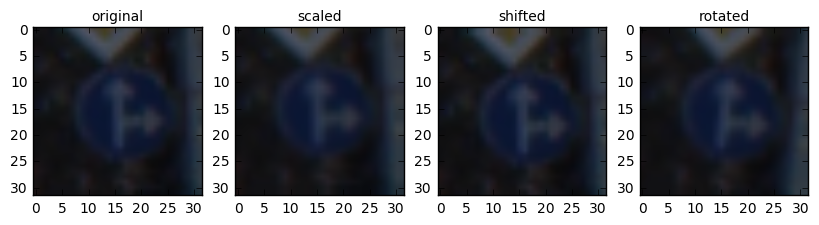

In [17]:
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (10,3))
ax1.imshow(X_train[1000])
ax1.set_title('original', fontsize=10)
ax2.imshow(scale_image(X_train[1000]))
ax2.set_title('scaled', fontsize = 10)
ax3.imshow(translate_image(X_train[1000]))
ax3.set_title('shifted', fontsize=10)
ax4.imshow(rotate_image(X_train[1000]))
ax4.set_title('rotated', fontsize=10)

# balance training set w/ anti-skew numpy array

### set up an anti-skew numpy array

In [18]:
# for training set
anti_skew_array = np.array([0,6,16,19,
                            20,21,22,
                            24,27,29,
                            30,32,34,
                            36,37,39,
                            40,41,42,
                            14,15,23,26,28,31,33,
                            3,4,5,7,8,9,10,11,17,18,25,35,1,2,12,13,38])
# 43

In [19]:
# for validation set
anti_skew_array_valid = np.array([0,0,0,0,6,6,6,6,16,16,16,16,19,19,19,19,
                            20,20,20,20,21,21,21,21,22,22,22,22,
                            24,24,24,24,27,27,27,27,29,29,29,29,
                            30,30,30,30,32,32,32,32,34,34,34,34,
                            36,36,36,36,37,37,37,37,39,39,39,39,
                            40,40,40,40,41,41,41,41,42,42,42,42,
                            14,14,15,15,23,23,26,26,28,28,31,31,33,33,
                            3,4,5,7,8,9,10,11,17,18,25,35,1,2,12,13,38])
# 90 + 17

### setup a few variables

In [20]:
# to store new images after transformation
new_X_train = []
new_y_train = []

In [21]:
new_hist, _ = np.histogram(y_train, bins=n_classes)

In [22]:
unique, index, count = np.unique(y_train, return_index=True, 
                                 return_counts=True)
hist, _ = np.histogram(y_train, bins=n_classes)

### the balancing loop
* for training set
    * increase set size from 34799 to 150k

In [23]:
while new_hist.sum() < 150000:
    # randomly select a class number from anti-skew array
    anti_skew_idx = np.random.randint(anti_skew_array.shape[0])
    class_no = anti_skew_array[anti_skew_idx]
    # randomly select an image
    image_idx = np.random.randint(hist[class_no])
    X_train_idx = index[class_no] + image_idx
    # randomly pick a transformation
    # then apply it to the image
    # finally append the result to a list
    pick = random.sample(range(0,3),1)
    if pick[0] == 0:
        new_X_train.append(scale_image(X_train[X_train_idx]))
    elif pick[0] == 1:
        new_X_train.append(translate_image(X_train[X_train_idx]))
    else:
        new_X_train.append(rotate_image(X_train[X_train_idx]))
    new_y_train.append(class_no)
    # increment the relevant class size
    new_hist[class_no] += 1

### meta-analysis

In [24]:
new_unique, new_index, new_count = np.unique(new_y_train, 
                                             return_index=True,
                                            return_counts=True)

[2644 2721 2692 2717 2609 2621 2640 2634 2693 2667 2711 2732 2757 2706 2771
 2661 2725 2725 2646 2729 2729 2654 2654 2605 2692 2688 2677 2663 2720 2692
 2612 2670 2579 2560 2737 2813 2719 2623 2715 2684 2663 2617 2634]


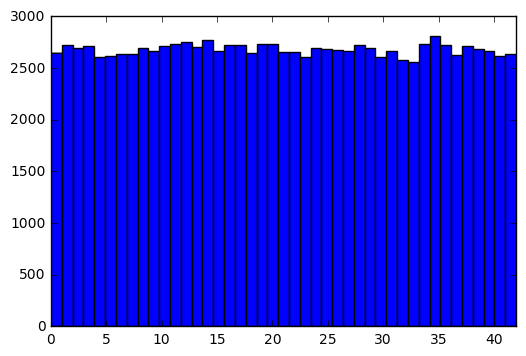

In [25]:
plt.hist(new_y_train, bins=n_classes)
plt.xlim(xmax=n_classes-1)
plt.show 

new_hist_after, _ = np.histogram(new_y_train, bins=n_classes)
print(new_hist_after)

In [26]:
new_hist.sum() - hist.sum()

115201

In [27]:
len(new_y_train)

115201

class 28 Children crossing


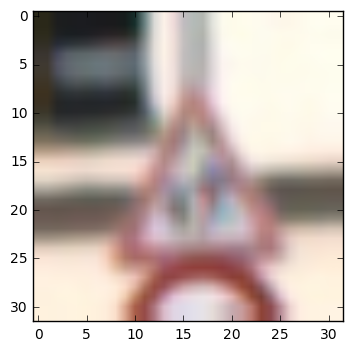

In [28]:
plt.imshow(new_X_train[0])
print('class', new_y_train[0],labels[new_y_train[0]])

### combining

In [29]:
new_X_train = np.array(new_X_train)
new_y_train = np.uint8(new_y_train)

In [30]:
X_train_aug = np.concatenate((X_train, new_X_train))
y_train_aug = np.concatenate((y_train, new_y_train))

In [31]:
X_train_aug.shape

(150000, 32, 32, 3)

[2824 4701 4702 3977 4379 4271 3000 3924 3953 3987 4511 3902 4647 4626 3461
 3201 3085 3715 3726 2909 3029 2924 2984 3055 2932 4038 3217 2873 3200 2932
 3002 3360 2789 3159 3097 3893 3049 2803 4575 2954 2963 2827 2844]


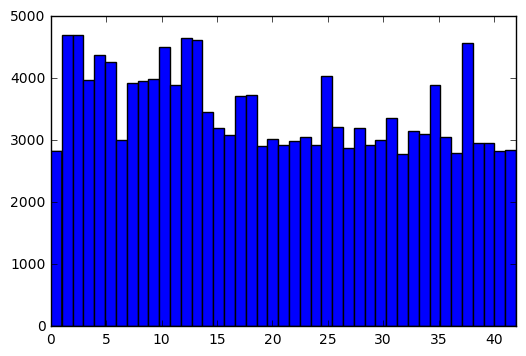

In [32]:
plt.hist(y_train_aug, bins=n_classes)
plt.xlim(xmax=n_classes-1)
plt.show 

hist_aug, _ = np.histogram(y_train_aug, bins=n_classes)
print(hist_aug)

# balance validation set w/ same anti-skew numpy array
* for validation set
    * increase set size from 4410 to 7000

### setup a few variables

In [33]:
# to store new images after transformation
new_X_valid = []
new_y_valid = []

In [34]:
new_hist_valid, _ = np.histogram(y_valid, bins=n_classes)

In [35]:
unique_valid, index_valid, count_valid = np.unique(y_valid, 
                                                   return_index=True, 
                                                   return_counts=True)
hist_valid, _ = np.histogram(y_valid, bins=n_classes)

### the balancing loop for validation set

In [36]:
while new_hist_valid.sum() < 7000:
    # randomly select a class number from anti-skew array
    anti_skew_idx = np.random.randint(anti_skew_array_valid.shape[0])
    class_no = anti_skew_array_valid[anti_skew_idx]
    # randomly select an image
    image_idx = np.random.randint(hist_valid[class_no])
    X_valid_idx = index_valid[class_no] + image_idx
    # randomly pick a transformation
    # then apply it to the image
    # finally append the result to a list
    pick = random.sample(range(0,3),1)
    if pick[0] == 0:
        new_X_valid.append(scale_image(X_valid[X_valid_idx]))
    elif pick[0] == 1:
        new_X_valid.append(translate_image(X_valid[X_valid_idx]))
    else:
        new_X_valid.append(rotate_image(X_valid[X_valid_idx]))
    new_y_valid.append(class_no)
    # increment the relevant class size
    new_hist_valid[class_no] += 1

### meta-analysis

In [37]:
new_unique_valid,new_index_valid,new_count_valid = np.unique(new_y_valid, 
                                             return_index=True,
                                            return_counts=True)

[118  19  32  26  22  22  87  21  26  23  21  15  14  24  46  49  88  24
  30 111  95 100 100  58 113  21  50  85  46  83  99  48  86  44  98  22
 105  93  22  87 107 102 108]


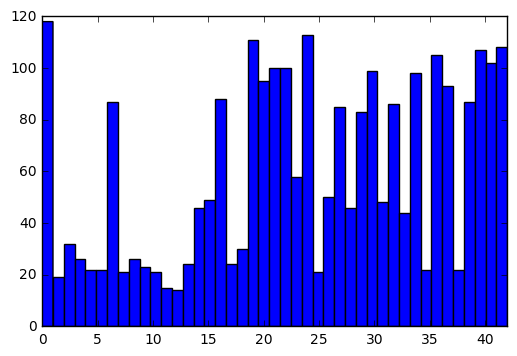

In [38]:
plt.hist(new_y_valid, bins=n_classes)
plt.xlim(xmax=n_classes-1)
plt.show 

new_hist_valid_after, _ = np.histogram(new_y_valid, bins=n_classes)
print(new_hist_valid_after)

In [39]:
len(new_y_valid)

2590

In [40]:
new_hist_valid.sum() - hist_valid.sum()

2590

class 16 Vechiles over 3.5 metric tons prohibited


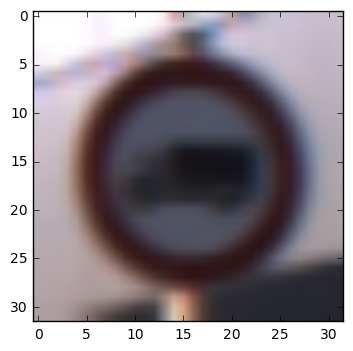

In [41]:
plt.imshow(new_X_valid[0])
print('class', new_y_valid[0],labels[new_y_valid[0]])

### combining

In [42]:
new_X_valid = np.array(new_X_valid)
new_y_valid = np.uint8(new_y_valid)

In [43]:
X_valid_aug = np.concatenate((X_valid, new_X_valid))
y_valid_aug = np.concatenate((y_valid, new_y_valid))

In [44]:
X_valid_aug.shape

(7000, 32, 32, 3)

[148 259 272 176 232 232 147 171 176 173 231 165 224 264 136 139 148 144
 150 141 155 160 160 118 143 171 110 115 106 113 159 138 116 134 158 142
 165 123 232 117 167 132 138]


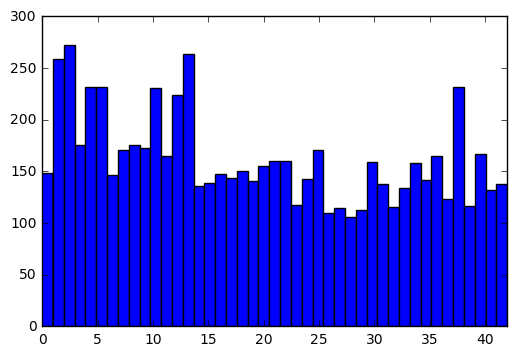

In [45]:
plt.hist(y_valid_aug, bins=n_classes)
plt.xlim(xmax=n_classes-1)
plt.show 

hist_valid_aug, _ = np.histogram(y_valid_aug, bins=n_classes)
print(hist_valid_aug)

# preprocess training/validation/testing sets
* original => Y => clahe

### convert original rgb to Y channel
* traffic signs are designed to work for color-blind people too
* use YCrCb's Y channel, which is basically gray

In [46]:
X_train_aug_gray =[]

for i in range(len(X_train_aug)):
    X_train_aug_gray.append(cv2.cvtColor(X_train_aug[i], 
                                     cv2.COLOR_RGB2YCrCb)[:,:,0]) 

X_train_aug_gray = np.array(X_train_aug_gray)

In [47]:
X_train_aug_gray.shape

(150000, 32, 32)

In [48]:
X_valid_aug_gray =[]
for i in range(len(X_valid_aug)):
    X_valid_aug_gray.append(cv2.cvtColor(X_valid_aug[i], 
                                     cv2.COLOR_RGB2YCrCb)[:,:,0])  
X_valid_aug_gray = np.array(X_valid_aug_gray)

In [49]:
X_valid_aug_gray.shape

(7000, 32, 32)

In [50]:
X_test_gray =[]
for i in range(len(X_test)):
    X_test_gray.append(cv2.cvtColor(X_test[i], 
                                    cv2.COLOR_RGB2YCrCb)[:,:,0])  
X_test_gray = np.array(X_test_gray)

### clahe

In [51]:
clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(4,4))

In [52]:
X_train_aug_gray_preprocessed = []

In [53]:
for i in range(len(X_train_aug_gray)):
    X_train_aug_gray_preprocessed.append(clahe.apply(X_train_aug_gray[i]))

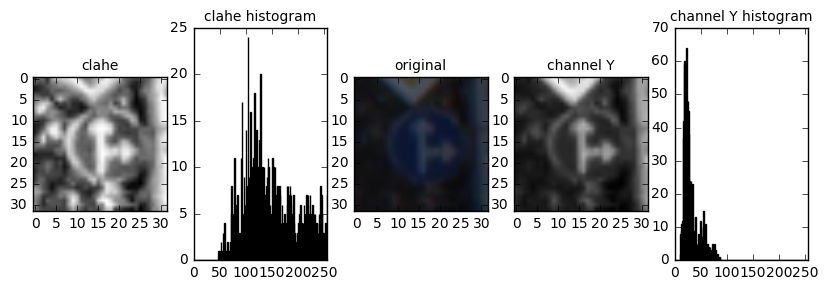

In [54]:
# clipLimit=10, tileGridSize=(4,4)
f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5,figsize = (10,3))
ax1.imshow(X_train_aug_gray_preprocessed[1000], cmap='gray')
ax1.set_title('clahe', fontsize=10)
ax2.set_xlim(0,256)
ax2.hist(X_train_aug_gray_preprocessed[1000].ravel(),256,[0,256]);
ax2.set_title('clahe histogram', fontsize = 10)
ax3.imshow(X_train_aug[1000])
ax3.set_title('original', fontsize=10)
ax4.imshow(X_train_aug_gray[1000], cmap='gray')
ax4.set_title('channel Y', fontsize=10)
ax5.set_xlim(0,256)
ax5.hist(X_train_aug_gray[1000].ravel(),256,[0,256]);
ax5.set_title('channel Y histogram', fontsize = 10)

In [55]:
X_valid_aug_gray_preprocessed = []
for i in range(len(X_valid_aug_gray)):
    X_valid_aug_gray_preprocessed.append(clahe.apply(X_valid_aug_gray[i]))

In [56]:
X_test_gray_preprocessed = []
for i in range(len(X_test_gray)):
    X_test_gray_preprocessed.append(clahe.apply(X_test_gray[i]))

### reshape and shuffle
* for training, validation and test sets

In [57]:
X_train_aug_gray_preprocessed = np.array(X_train_aug_gray_preprocessed)
X_train_aug_gray_preprocessed=X_train_aug_gray_preprocessed.reshape(
    X_train_aug_gray_preprocessed.shape+(1,))
X_train_aug_gray_preprocessed_shuffled, y_train_aug_shuffled = \
                shuffle(X_train_aug_gray_preprocessed, 
                        y_train_aug, random_state = 86)

In [58]:
X_valid_aug_gray_preprocessed = np.array(X_valid_aug_gray_preprocessed)
X_valid_aug_gray_preprocessed = X_valid_aug_gray_preprocessed.reshape(
    X_valid_aug_gray_preprocessed.shape + (1,))
X_valid_aug_gray_preprocessed_shuffled, y_valid_aug_shuffled = \
                shuffle(X_valid_aug_gray_preprocessed, 
                        y_valid_aug, random_state = 86)

In [59]:
X_test_gray_preprocessed = np.array(X_test_gray_preprocessed)
X_test_gray_preprocessed = X_test_gray_preprocessed.reshape(
    X_test_gray_preprocessed.shape + (1,))
X_test_gray_preprocessed_shuffled, y_test_shuffled = \
                shuffle(X_test_gray_preprocessed, y_test, 
                        random_state = 86)

# design convnet architecture
* use LeNet5

In [60]:
def LeNet5(x,keep_prob):    
    
    # conv1
    mu = 0   # zero mean for weight initialization
    sigma = 0.1   # unit variance for weigth initialization
    # 6 of (5x5)x1 filters
    # output of conv1: 6 feature(activation) maps, each with size 28x28
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), \
                                       mean = mu, stddev = sigma))
    
    # xavier initialization
    #conv1_W = tf.get_variable('weights_conv1',shape=(5,5,1,6), 
    #            initializer = tf.contrib.layers.xavier_initializer())
    
    conv1_b = tf.Variable(tf.zeros(6))
    # zero padding, 1x1 stride
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], \
                           padding='VALID') + conv1_b     

    # relu1
    relu1 = tf.nn.relu(conv1)
    
    # max_pool1
    # pool_size is 2x2 and pool_stride is 2x2
    # output of max_pool1: 6 feature maps, each with size 14x14
    max_pool1 = tf.nn.max_pool(relu1, ksize=[1, 2, 2, 1], \
                           strides=[1, 2, 2, 1], padding='VALID')    

    # conv2
    # 16 of (5x5)x6 filters
    # output of conv2: 16 feature maps, each with size 10x10
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16),\
                                        mean = mu, stddev = sigma))

    # xavier initialization
    #conv2_W = tf.get_variable('weights_conv2',shape=(5,5,6,16), 
    #            initializer = tf.contrib.layers.xavier_initializer())

    conv2_b = tf.Variable(tf.zeros(16))
    # zero padding, 1x1 stride
    conv2   = tf.nn.conv2d(max_pool1, conv2_W, strides=[1, 1, 1, 1], \
                           padding='VALID') + conv2_b
    
    # relu2
    relu2 = tf.nn.relu(conv2)
    
    # max_pool2
    # pool_size is 2x2 and pool_stride is 2x2
    # output of max_pool2: 16 feature maps, each with size 5x5
    max_pool2 = tf.nn.max_pool(relu2, ksize=[1, 2, 2, 1],\
                           strides=[1, 2, 2, 1], padding='VALID')
    
    # flat
    # output: one vector with length 400
    # (5x5)x16 = 400
    flat   = flatten(max_pool2)
    
    # fc1
    # 120 neurons
    # output: one vector with length 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), \
                                        mean = mu, stddev = sigma))

    # xavier initialization
    #fc1_W = tf.get_variable('weights_fc1',shape=(400,120), 
    #            initializer = tf.contrib.layers.xavier_initializer())
    
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(flat, fc1_W) + fc1_b
    
    
    # relu3
    relu3    = tf.nn.relu(fc1)
    
    # dropout1
    dropout1 = tf.nn.dropout(relu3, keep_prob)

    # fc2
    # 84 neurons
    # output: one vector with length 84
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), \
                                        mean = mu, stddev = sigma))

    # xavier initialization
    #fc2_W = tf.get_variable('weights_fc2',shape=(120,84), 
    #            initializer = tf.contrib.layers.xavier_initializer())
    
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(dropout1, fc2_W) + fc2_b
    
    
    # relu4
    relu4    = tf.nn.relu(fc2)

    # dropout2
    dropout2 = tf.nn.dropout(relu4, keep_prob)

    # fc3
    # 43 neurons
    # output: one vector with length 43
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), \
                                        mean = mu, stddev = sigma))

    # xavier initialization
    #fc3_W = tf.get_variable('weights_fc3',shape=(84,43), 
    #            initializer = tf.contrib.layers.xavier_initializer())
    
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(dropout2, fc3_W) + fc3_b
    
    # a vector of classification probabilities
    return logits

# set up training

### setup input and labels

In [61]:
# define input size: image of 32x32 with one channel
# batch size is undefined
x = tf.placeholder(tf.float32, (None, 32, 32, 1))

# define label
y = tf.placeholder(tf.int32, (None))

# convert label to one hot representation
one_hot_y = tf.one_hot(y, 43)

# define a dropout percentage variable
keep_prob = tf.placeholder(tf.float32)

### setup loss function and adam optimizer

In [62]:
# learning rate
rate = 0.001

# create a LeNet5 instance
logits = LeNet5(x, keep_prob)

# define a loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(\
                                    labels=one_hot_y,logits=logits)

# define an optimization routine
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### define evaluate function

In [63]:
# batch size depends on the memory size
BATCH_SIZE = 128

correct_prediction = tf.equal(tf.argmax(logits, 1),\
                              tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, \
                                            tf.float32))
saver = tf.train.Saver()

In [64]:
def evaluate_acc(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]  
        batch_y = y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, \
                            feed_dict={x: batch_x, y: batch_y, \
                                       keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# train

In [65]:
# one epoch is one set of all training images
EPOCH_UPPER_LIMIT = 100
EPOCH = 0


today = datetime.date.today().strftime('%b%d')
HHMM = time.strftime('%I%p%M')

starting_time = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    valid_accuracy_history = []
    valid_average_history = []
    train_accuracy_history = []
    
    print("Start training...")
    print()
    for i in range(EPOCH_UPPER_LIMIT):

        X_train_aug_gray_preprocessed_shuffled, y_train_aug_shuffled = \
        shuffle(X_train_aug_gray_preprocessed_shuffled,y_train_aug_shuffled)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x = X_train_aug_gray_preprocessed_shuffled[offset:end]
            batch_y = y_train_aug_shuffled[offset:end]
            
            sess.run(training_operation, \
                     feed_dict={x: batch_x, y: batch_y, keep_prob:0.7})
        
            
        validation_accuracy = evaluate_acc(
                        X_valid_aug_gray_preprocessed_shuffled, 
                        y_valid_aug_shuffled)
        
        valid_accuracy_history.append(validation_accuracy)
        
        training_accuracy = evaluate_acc(
                        X_train_aug_gray_preprocessed_shuffled, 
                        y_train_aug_shuffled)
        
        train_accuracy_history.append(training_accuracy)

        # exit the loop if validation_accuracy > 0.95
        if validation_accuracy > 0.95:
            EPOCH = i
            print('validation accuracy reaches 0.95 at epoch {}'.format(EPOCH))
            print('exit the training loop')
            print()
            break
        
        # print out average of last three at every 5 epochs
        if (i+1) % 5 == 0:
            valid_average = sum(valid_accuracy_history[(i-2):])/3
            valid_average_history.append(valid_average)
            train_average = sum(train_accuracy_history[(i-2):])/3
            print("over last three epochs {}, {}, {}".format(i-1,i,i+1))
            print("validation accuracy avg = {:.3f}".format(valid_average))
            print("training accuracy avg = {:.3f}".format(train_average))
            print()
            
        if (len(valid_average_history)>0)and(valid_average_history[0]<0.7):
            print('initial validation accuracy avg is below 0.7')
            print('exit the training loop')
            print()
            break

        # drop learning rate to 1e-4 when
        # validation_accuracy > 0.9 AND 
        # the difference of successive valid_averages < 0.01
        if (validation_accuracy > 0.9) and \
            ((valid_average_history[-1]-valid_average_history[-2])<0.01)and \
            (rate != 0.0001):
            rate = 0.0001
            print('new learning rate 1e-4 starting from epoch {}'.format(i))
            print()
            
    saver.save(sess, './proj2-'+today+'-'+HHMM)
    print("Model saved")
    print("Training Time:",round(time.time()-starting_time,0)," seconds")

Start training...

over last three epochs 3, 4, 5
validation accuracy avg = 0.725
training accuracy avg = 0.776

over last three epochs 8, 9, 10
validation accuracy avg = 0.860
training accuracy avg = 0.905

over last three epochs 13, 14, 15
validation accuracy avg = 0.897
training accuracy avg = 0.942

over last three epochs 18, 19, 20
validation accuracy avg = 0.927
training accuracy avg = 0.961

over last three epochs 23, 24, 25
validation accuracy avg = 0.928
training accuracy avg = 0.969

new learning rate 1e-4 starting from epoch 24

over last three epochs 28, 29, 30
validation accuracy avg = 0.931
training accuracy avg = 0.974

over last three epochs 33, 34, 35
validation accuracy avg = 0.937
training accuracy avg = 0.978

validation accuracy reaches 0.95 at epoch 38
exit the training loop

Model saved
Training Time: 1135.0  seconds


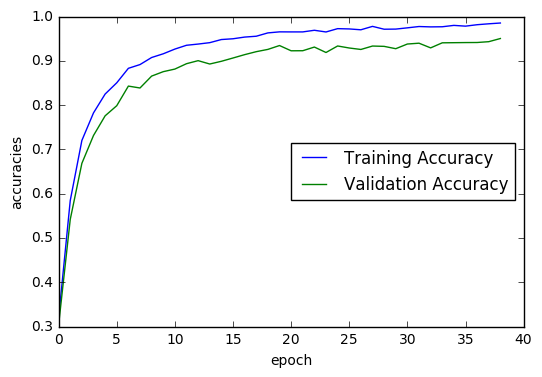

In [66]:
plt.plot(range(len(train_accuracy_history)),train_accuracy_history,'b',\
         label ='Training Accuracy')
plt.plot(range(len(valid_accuracy_history)),valid_accuracy_history,'g',\
         label ='Validation Accuracy')
plt.legend(loc='center right')
plt.xlabel('epoch')
plt.ylabel('accuracies')

# check accuracy

In [67]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('proj2-'+today+'-'+HHMM+'.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = accuracy_operation.eval(feed_dict={
        x: X_test_gray_preprocessed_shuffled, 
        y: y_test_shuffled,keep_prob:1.0})
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.942


# five new images from youtube

In [68]:
import glob
import matplotlib.image as mpimg
new_images = []
youtube_images = glob.glob('data/*.png')
for images in youtube_images:
    new_images.append(mpimg.imread(images))

In [69]:
# Define the new image labels based on signnames.csv definitions
y_new_images = [33, 12, 8, 18, 1]

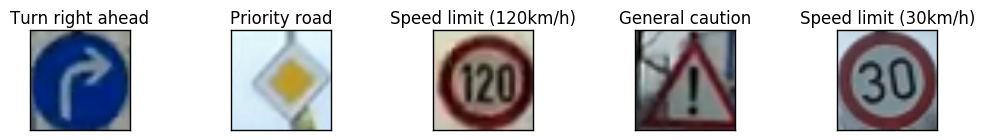

In [70]:
fig = plt.figure(figsize = (10,1))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,\
                    hspace=0.05,wspace=0.05)
for i in range(len(new_images)):
    axis = fig.add_subplot(1,5,i+1, xticks=[], yticks=[])
    axis.imshow(new_images[i])
    axis.set_title("%s" % labels[y_new_images[i]])

In [71]:
X_new_images_data = np.array(new_images)
X_new_images_data = np.array(X_new_images_data*255, dtype='uint8')

### preprocessing new test images
* original => Y => CLAHE => reshape

In [72]:
X_new_images_data_gray = []

for i in range(len(X_new_images_data)):
    X_new_images_data_gray.append(cv2.cvtColor(X_new_images_data[i], 
                                     cv2.COLOR_RGB2YCrCb)[:,:,0])  

In [73]:
X_new_images_data_gray_preprocessed = []
for i in range(len(X_new_images_data_gray)):
    X_new_images_data_gray_preprocessed.append(
    clahe.apply(X_new_images_data_gray[i]))

In [74]:
X_new_images_data_gray_preprocessed = \
        np.array(X_new_images_data_gray_preprocessed)
X_new_images_data_gray_preprocessed= \
        X_new_images_data_gray_preprocessed.reshape(
        X_new_images_data_gray_preprocessed.shape+(1,))

### predict

In [75]:
# returns prediction on new test images

def get_prediction(X_data, y_data):
    
    num_examples = len(X_data)

    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        batch_y = y_data[offset:offset+BATCH_SIZE]
        correct_pred = sess.run(correct_prediction, \
                                feed_dict={x: batch_x, \
                                            y: batch_y, \
                                            keep_prob: 1})
    return correct_pred

In [76]:
with tf.Session() as sess:
    
    # load saved weights
    loader = tf.train.import_meta_graph('proj2-'+today+'-'+HHMM+'.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    # run on new test images
    test_prediction=get_prediction(X_new_images_data_gray_preprocessed,\
                                    y_new_images)
    
    print("Prediction Result:", test_prediction)
    

Prediction Result: [ True  True  True  True False]


# get top 5

In [77]:
# earlier ... logits = LeNet5(x, keep_prob)
softmax_prediction = tf.nn.softmax(logits)

In [78]:
# return top 5 predictions in each new test images

def get_top_k(X_data, y_data, top_k_number):
    
    num_examples = len(X_data)

    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        batch_y = y_data[offset:offset+BATCH_SIZE]
        softmax_pred = sess.run(softmax_prediction, \
                                feed_dict={x: batch_x, \
                                            y: batch_y, \
                                            keep_prob: 1.0})
        
        top_k_values, top_k_indices = tf.nn.top_k(softmax_pred, \
                                                  k=top_k_number, \
                                                  sorted=True)
        
        top_k_val = np.array([top_k_values.eval()])
        top_k_idx = np.array([top_k_indices.eval()])
    
    return top_k_val, top_k_idx

In [79]:
with tf.Session() as sess:
    
    # load saved weights
    loader = tf.train.import_meta_graph('proj2-'+today+'-'+HHMM+'.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))    

    
    test_accuracy = accuracy_operation.eval(feed_dict={
        x: X_new_images_data_gray_preprocessed, \
            y: y_new_images, keep_prob: 1.0})
    
    # return top five prediction scores in each new test images
    top_k_val, top_k_idx = get_top_k(X_new_images_data_gray_preprocessed, \
                                     y_new_images, 5) 

In [80]:
print('1st,2nd,3rd,4th,5th predictions')
print()
print(top_k_idx)

1st,2nd,3rd,4th,5th predictions

[[[33 40 39 17 35]
  [12 40 15  9 13]
  [ 8  7  4  0  1]
  [18 26 36 27 35]
  [38  8  0  2 34]]]


In [81]:
# define a function to show the top five predictions

def display_top_five(idx, images, top_k_val, \
                       top_k_idx, labels, y_new_images):
    print ("1st prediction w/ probability of %.4f: %-30s  " % \
           (top_k_val[0, idx, 0],labels[top_k_idx[0, idx, 0]]))   
    print ("2nd prediction w/ probability of %.4f: %-30s  " % \
           (top_k_val[0, idx, 1],labels[top_k_idx[0, idx, 1]]))
    print ("3rd prediction w/ probability of %.4f: %-30s  " % \
           (top_k_val[0, idx, 2],labels[top_k_idx[0, idx, 2]]))
    print ("4th prediction w/ probability of %.4f: %-30s  " % \
           (top_k_val[0, idx, 3],labels[top_k_idx[0, idx, 3]]))
    print ("5th prediction w/ probability of %.4f: %-30s  " % \
           (top_k_val[0, idx, 4],labels[top_k_idx[0, idx, 4]])) 
    
    plt.figure(figsize=(2.5,2.5))
    plt.imshow(images[idx])
    plt.title("true label: %s " % labels[y_new_images[idx]], color='red')

1st prediction w/ probability of 0.9991: Turn right ahead                
2nd prediction w/ probability of 0.0007: Roundabout mandatory            
3rd prediction w/ probability of 0.0001: Keep left                       
4th prediction w/ probability of 0.0000: No entry                        
5th prediction w/ probability of 0.0000: Ahead only                      


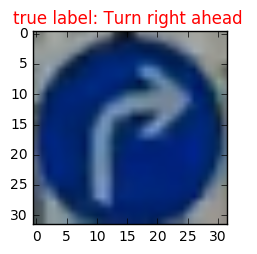

In [82]:
display_top_five(0, new_images, top_k_val, \
                   top_k_idx, labels, y_new_images)

1st prediction w/ probability of 1.0000: Priority road                   
2nd prediction w/ probability of 0.0000: Roundabout mandatory            
3rd prediction w/ probability of 0.0000: No vechiles                     
4th prediction w/ probability of 0.0000: No passing                      
5th prediction w/ probability of 0.0000: Yield                           


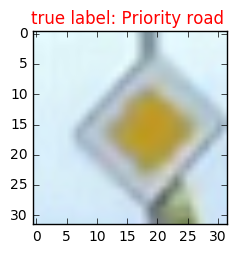

In [83]:
display_top_five(1, new_images, top_k_val, \
                   top_k_idx, labels, y_new_images)

1st prediction w/ probability of 0.8520: Speed limit (120km/h)           
2nd prediction w/ probability of 0.1081: Speed limit (100km/h)           
3rd prediction w/ probability of 0.0216: Speed limit (70km/h)            
4th prediction w/ probability of 0.0148: Speed limit (20km/h)            
5th prediction w/ probability of 0.0030: Speed limit (30km/h)            


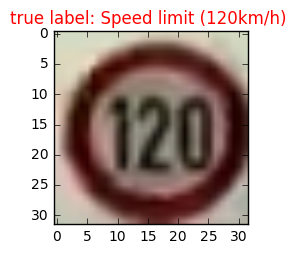

In [84]:
display_top_five(2, new_images, top_k_val, \
                   top_k_idx, labels, y_new_images)

1st prediction w/ probability of 0.7114: General caution                 
2nd prediction w/ probability of 0.2848: Traffic signals                 
3rd prediction w/ probability of 0.0025: Go straight or right            
4th prediction w/ probability of 0.0003: Pedestrians                     
5th prediction w/ probability of 0.0003: Ahead only                      


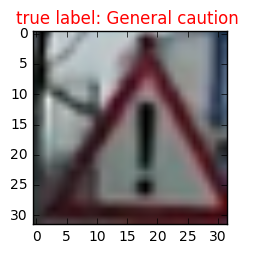

In [85]:
display_top_five(3, new_images, top_k_val, \
                   top_k_idx, labels, y_new_images)

1st prediction w/ probability of 0.7848: Keep right                      
2nd prediction w/ probability of 0.1439: Speed limit (120km/h)           
3rd prediction w/ probability of 0.0264: Speed limit (20km/h)            
4th prediction w/ probability of 0.0139: Speed limit (50km/h)            
5th prediction w/ probability of 0.0129: Turn left ahead                 


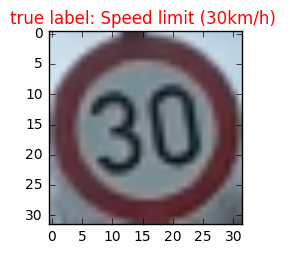

In [86]:
display_top_five(4, new_images, top_k_val, \
                   top_k_idx, labels, y_new_images)